<a href="https://colab.research.google.com/github/ayoubsalmi99/LEAN-4.0-PROJECT/blob/main/zoningtex4_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

importer des librairies 


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Sequential
from sklearn.metrics import classification_report , confusion_matrix
from tensorflow.keras.callbacks import EarlyStopping

In [4]:
zon_tex = pd.read_csv('BDDZonTex.csv',sep = ';')
zon_tex.head()

,I1,I2,I3,I4,I5,I6,I7,I8,I9,I10,I11,I12,I13,I14,I15,I16,I17,I18,I19,I20,I21,I22,I23,I24,I25,I26,I27,I28,I29,I30,I31,I32,I33,I34,I35,Z1,Z2,Z3,Z4,Z5,Z6,Z7,Z8,Z9,Z10,Z11
0,2,3,5,1,5,5,4,5,5,2,4,2,5,5,5,5,5,3,2,4,4,5,5,3,5,5,1,4,5,4,4,3,5,5,5,1,0,0,0,0,0,0,0,0,0,0
1,2,3,5,1,5,4,4,4,5,2,4,2,4,5,5,5,5,2,3,5,4,4,4,3,5,4,1,4,4,4,4,3,5,5,5,1,0,0,0,0,0,0,0,0,0,0
2,2,3,5,1,4,5,5,4,4,2,5,2,5,4,4,4,4,3,2,4,4,5,4,3,5,5,1,4,5,4,5,4,5,4,5,1,0,0,0,0,0,0,0,0,0,0
3,1,3,5,1,5,5,4,4,5,1,4,2,5,5,5,5,5,3,2,4,4,5,4,3,5,5,2,5,5,4,5,4,5,5,5,1,0,0,0,0,0,0,0,0,0,0
4,2,3,4,1,5,5,4,5,5,2,4,1,5,5,5,5,5,3,2,4,4,5,4,3,5,5,1,4,5,4,5,4,5,5,5,1,0,0,0,0,0,0,0,0,0,0


In [5]:
X = zon_tex.iloc[:,1:35]
Y = zon_tex.iloc[:,35:]
print(X.head())
print('-----------------------------------')
print(Y.head())

   I2  I3  I4  I5  I6  I7  I8  I9  ...  I28  I29  I30  I31  I32  I33  I34  I35
0   3   5   1   5   5   4   5   5  ...    4    5    4    4    3    5    5    5
1   3   5   1   5   4   4   4   5  ...    4    4    4    4    3    5    5    5
2   3   5   1   4   5   5   4   4  ...    4    5    4    5    4    5    4    5
3   3   5   1   5   5   4   4   5  ...    5    5    4    5    4    5    5    5
4   3   4   1   5   5   4   5   5  ...    4    5    4    5    4    5    5    5

[5 rows x 34 columns]
-----------------------------------
   Z1  Z2  Z3  Z4  Z5  Z6  Z7  Z8  Z9  Z10  Z11
0   1   0   0   0   0   0   0   0   0    0    0
1   1   0   0   0   0   0   0   0   0    0    0
2   1   0   0   0   0   0   0   0   0    0    0
3   1   0   0   0   0   0   0   0   0    0    0
4   1   0   0   0   0   0   0   0   0    0    0


In [6]:
from sklearn.model_selection import train_test_split
train_X , test_X = train_test_split(X,test_size = 0.1, random_state=42)
train_Y , test_Y = train_test_split(Y,test_size = 0.1, random_state=42)

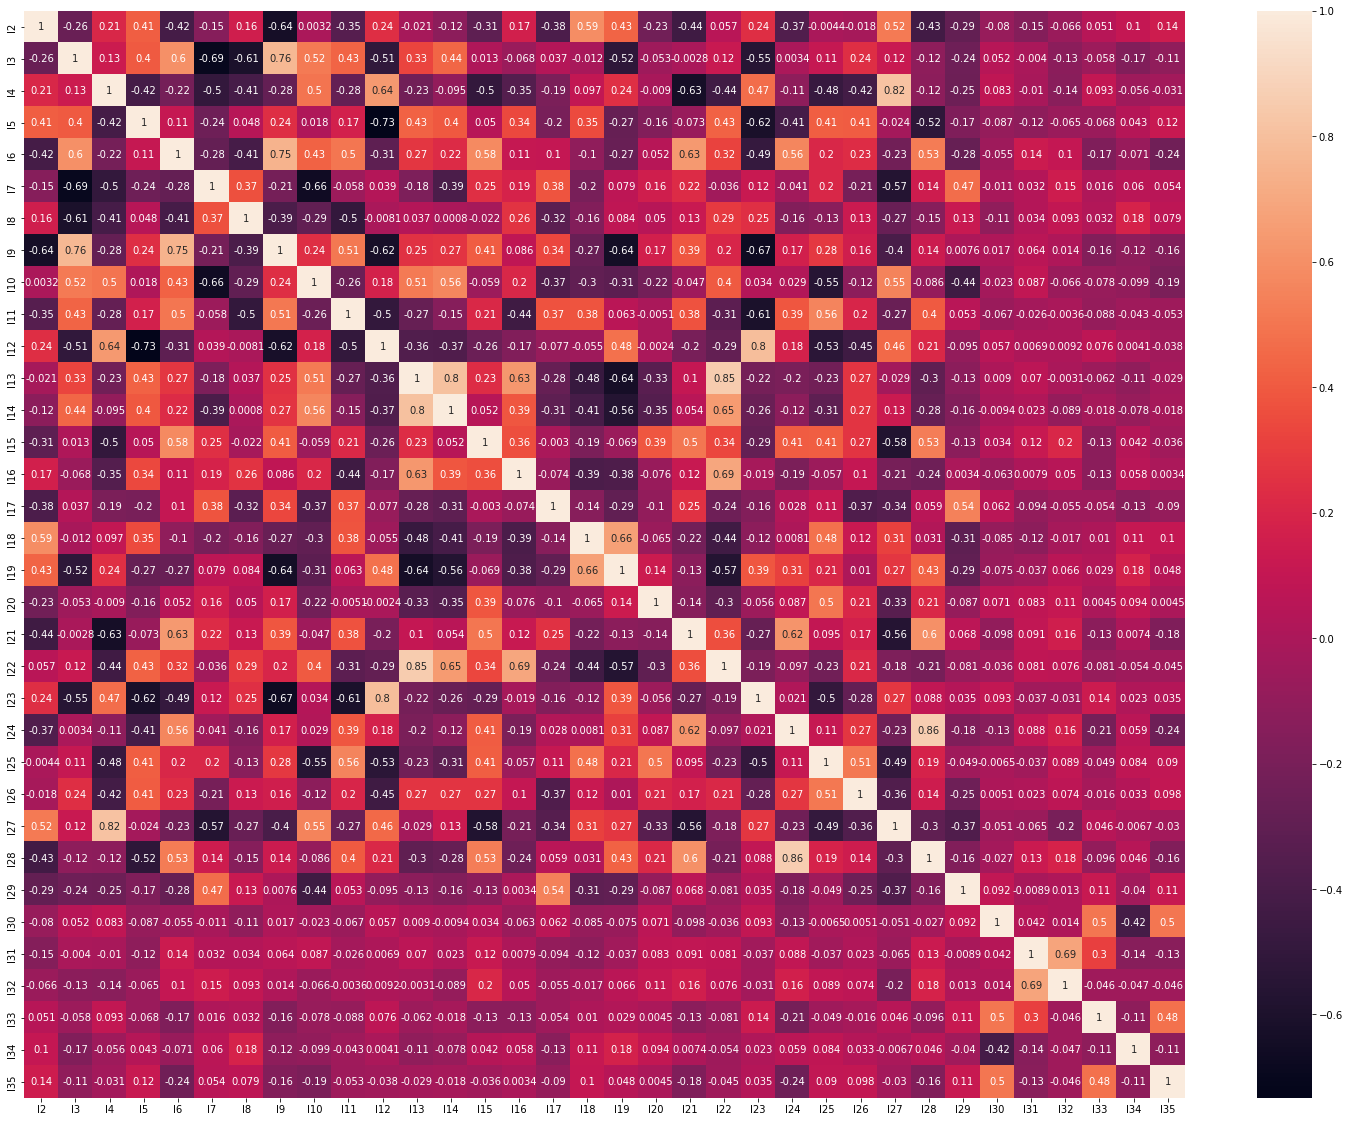

In [7]:
X.corr()
plt.figure(figsize=(26,20))
sns.heatmap(X.corr(), annot=True)


In [8]:
Model = Sequential([
  layers.Dense(64, activation="relu"),
  layers.Dense(32, activation="relu"),
  tf.keras.layers.Dropout(0.3),
  layers.Dense(11, activation ="softmax")
])

In [9]:
Model.compile(optimizer='adam' , loss='categorical_crossentropy' , metrics=['accuracy'])


In [10]:
earlystopping_A = EarlyStopping(monitor = 'val_loss' , mode = 'min' , patience = 3 , verbose = 1)

In [11]:
history = Model.fit(x = train_X, y = train_Y  , validation_data=(test_X , test_Y) , epochs = 200 , callbacks=[earlystopping_A])

Epoch 1/200
5/5 [==============================] - 1s 71ms/step - loss: 3.5882 - accuracy: 0.1087 - val_loss: 2.1846 - val_accuracy: 0.1875
Epoch 2/200
5/5 [==============================] - 0s 8ms/step - loss: 2.6733 - accuracy: 0.1377 - val_loss: 2.1245 - val_accuracy: 0.0625
Epoch 3/200
5/5 [==============================] - 0s 8ms/step - loss: 2.4550 - accuracy: 0.1667 - val_loss: 2.1389 - val_accuracy: 0.0625
Epoch 4/200
5/5 [==============================] - 0s 8ms/step - loss: 2.4260 - accuracy: 0.1377 - val_loss: 2.1725 - val_accuracy: 0.0625
Epoch 5/200
5/5 [==============================] - 0s 9ms/step - loss: 2.2231 - accuracy: 0.1812 - val_loss: 2.0969 - val_accuracy: 0.0625
Epoch 6/200
5/5 [==============================] - 0s 8ms/step - loss: 2.1306 - accuracy: 0.1957 - val_loss: 2.0140 - val_accuracy: 0.1250
Epoch 7/200
5/5 [==============================] - 0s 8ms/step - loss: 2.0652 - accuracy: 0.2464 - val_loss: 1.9850 - val_accuracy: 0.1875
Epoch 8/200
5/5 [=========

<function matplotlib.pyplot.show>

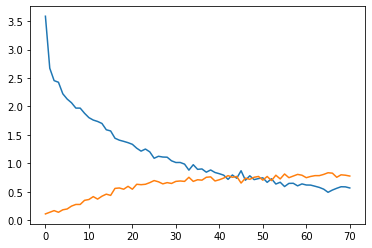

In [12]:
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.show

In [25]:
Model.predict(tf.expand_dims(test_X.iloc[2],axis=0))

array([[5.27960062e-03, 6.25136672e-05, 3.02310311e-03, 8.27827607e-04,
        7.37569053e-06, 3.26151098e-03, 7.78494254e-02, 3.52289230e-02,
        4.82569495e-03, 1.11450255e-02, 8.58488977e-01]], dtype=float32)

In [26]:
test_Y

,Z1,Z2,Z3,Z4,Z5,Z6,Z7,Z8,Z9,Z10,Z11
15,0,1,0,0,0,0,0,0,0,0,0
94,0,0,0,0,0,0,1,0,0,0,0
152,0,0,0,0,0,0,0,0,0,0,1
105,0,0,0,0,0,0,0,1,0,0,0
109,0,0,0,0,0,0,0,1,0,0,0
65,0,0,0,0,1,0,0,0,0,0,0
18,0,1,0,0,0,0,0,0,0,0,0
45,0,0,0,1,0,0,0,0,0,0,0
36,0,0,1,0,0,0,0,0,0,0,0
55,0,0,0,1,0,0,0,0,0,0,0


In [21]:
model_eval = Model.evaluate(test_X, test_Y, return_dict=True)

1/1 [==============================] - 0s 24ms/step - loss: 0.2304 - accuracy: 0.9375


In [22]:
Model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                2240      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 11)                363       
                                                                 
Total params: 4,683
Trainable params: 4,683
Non-trainable params: 0
_________________________________________________________________


In [23]:
test_X

,I2,I3,I4,I5,I6,I7,I8,I9,I10,I11,I12,I13,I14,I15,I16,I17,I18,I19,I20,I21,I22,I23,I24,I25,I26,I27,I28,I29,I30,I31,I32,I33,I34,I35
15,3,5,1,5,5,4,4,5,2,4,2,5,5,5,5,5,3,2,4,4,5,4,4,5,5,1,4,5,5,5,4,5,4,5
94,3,3,5,2,3,4,4,2,1,4,5,3,4,4,4,5,4,5,4,3,3,5,4,4,4,3,5,5,4,4,3,5,5,5
152,5,4,5,4,5,3,4,2,5,3,4,5,5,5,5,3,4,5,4,3,5,5,4,4,5,4,5,5,4,5,4,5,5,5
105,5,3,4,4,3,4,4,1,3,3,5,5,5,4,5,5,3,3,3,3,5,5,3,3,4,4,3,5,4,4,3,5,5,5
109,5,3,4,4,3,4,4,1,3,3,5,5,5,4,5,5,3,3,3,3,5,5,3,3,4,4,3,5,4,4,3,5,5,5
65,4,1,1,3,4,5,5,2,1,3,5,4,4,5,5,5,3,4,4,5,5,5,4,4,4,1,5,5,4,5,5,5,5,5
18,3,5,1,5,5,4,4,5,2,4,2,5,5,5,5,5,3,2,4,4,5,4,4,5,5,1,4,5,4,5,4,5,5,5
45,3,1,1,3,3,5,5,1,1,3,4,5,5,5,5,4,2,4,4,4,5,5,4,4,5,1,5,5,4,4,4,4,5,5
36,4,2,4,3,3,5,4,2,1,3,5,4,4,5,5,5,3,4,5,2,4,5,3,5,4,2,4,5,4,4,3,5,5,5
55,3,1,1,3,3,5,5,1,1,3,4,5,5,5,5,4,2,4,4,4,5,5,4,4,5,1,5,5,4,5,4,5,5,5


In [24]:
A = Model.predict(test_X)
np.argmax(A,axis=1)

array([ 0,  6, 10,  7,  7,  4,  1,  3,  2,  3,  6, 10,  1, 10,  6,  6])

In [18]:
zon_tex.iloc[15,:]

I1     2
I2     3
I3     5
I4     1
I5     5
I6     5
I7     4
I8     4
I9     5
I10    2
I11    4
I12    2
I13    5
I14    5
I15    5
I16    5
I17    5
I18    3
I19    2
I20    4
I21    4
I22    5
I23    4
I24    4
I25    5
I26    5
I27    1
I28    4
I29    5
I30    5
I31    5
I32    4
I33    5
I34    4
I35    5
Z1     0
Z2     1
Z3     0
Z4     0
Z5     0
Z6     0
Z7     0
Z8     0
Z9     0
Z10    0
Z11    0
Name: 15, dtype: int64

In [27]:
Model.save('model')

INFO:tensorflow:Assets written to: model/assets
